<a href="https://colab.research.google.com/github/JebinAbraham/Linear-Regression/blob/main/Linear-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

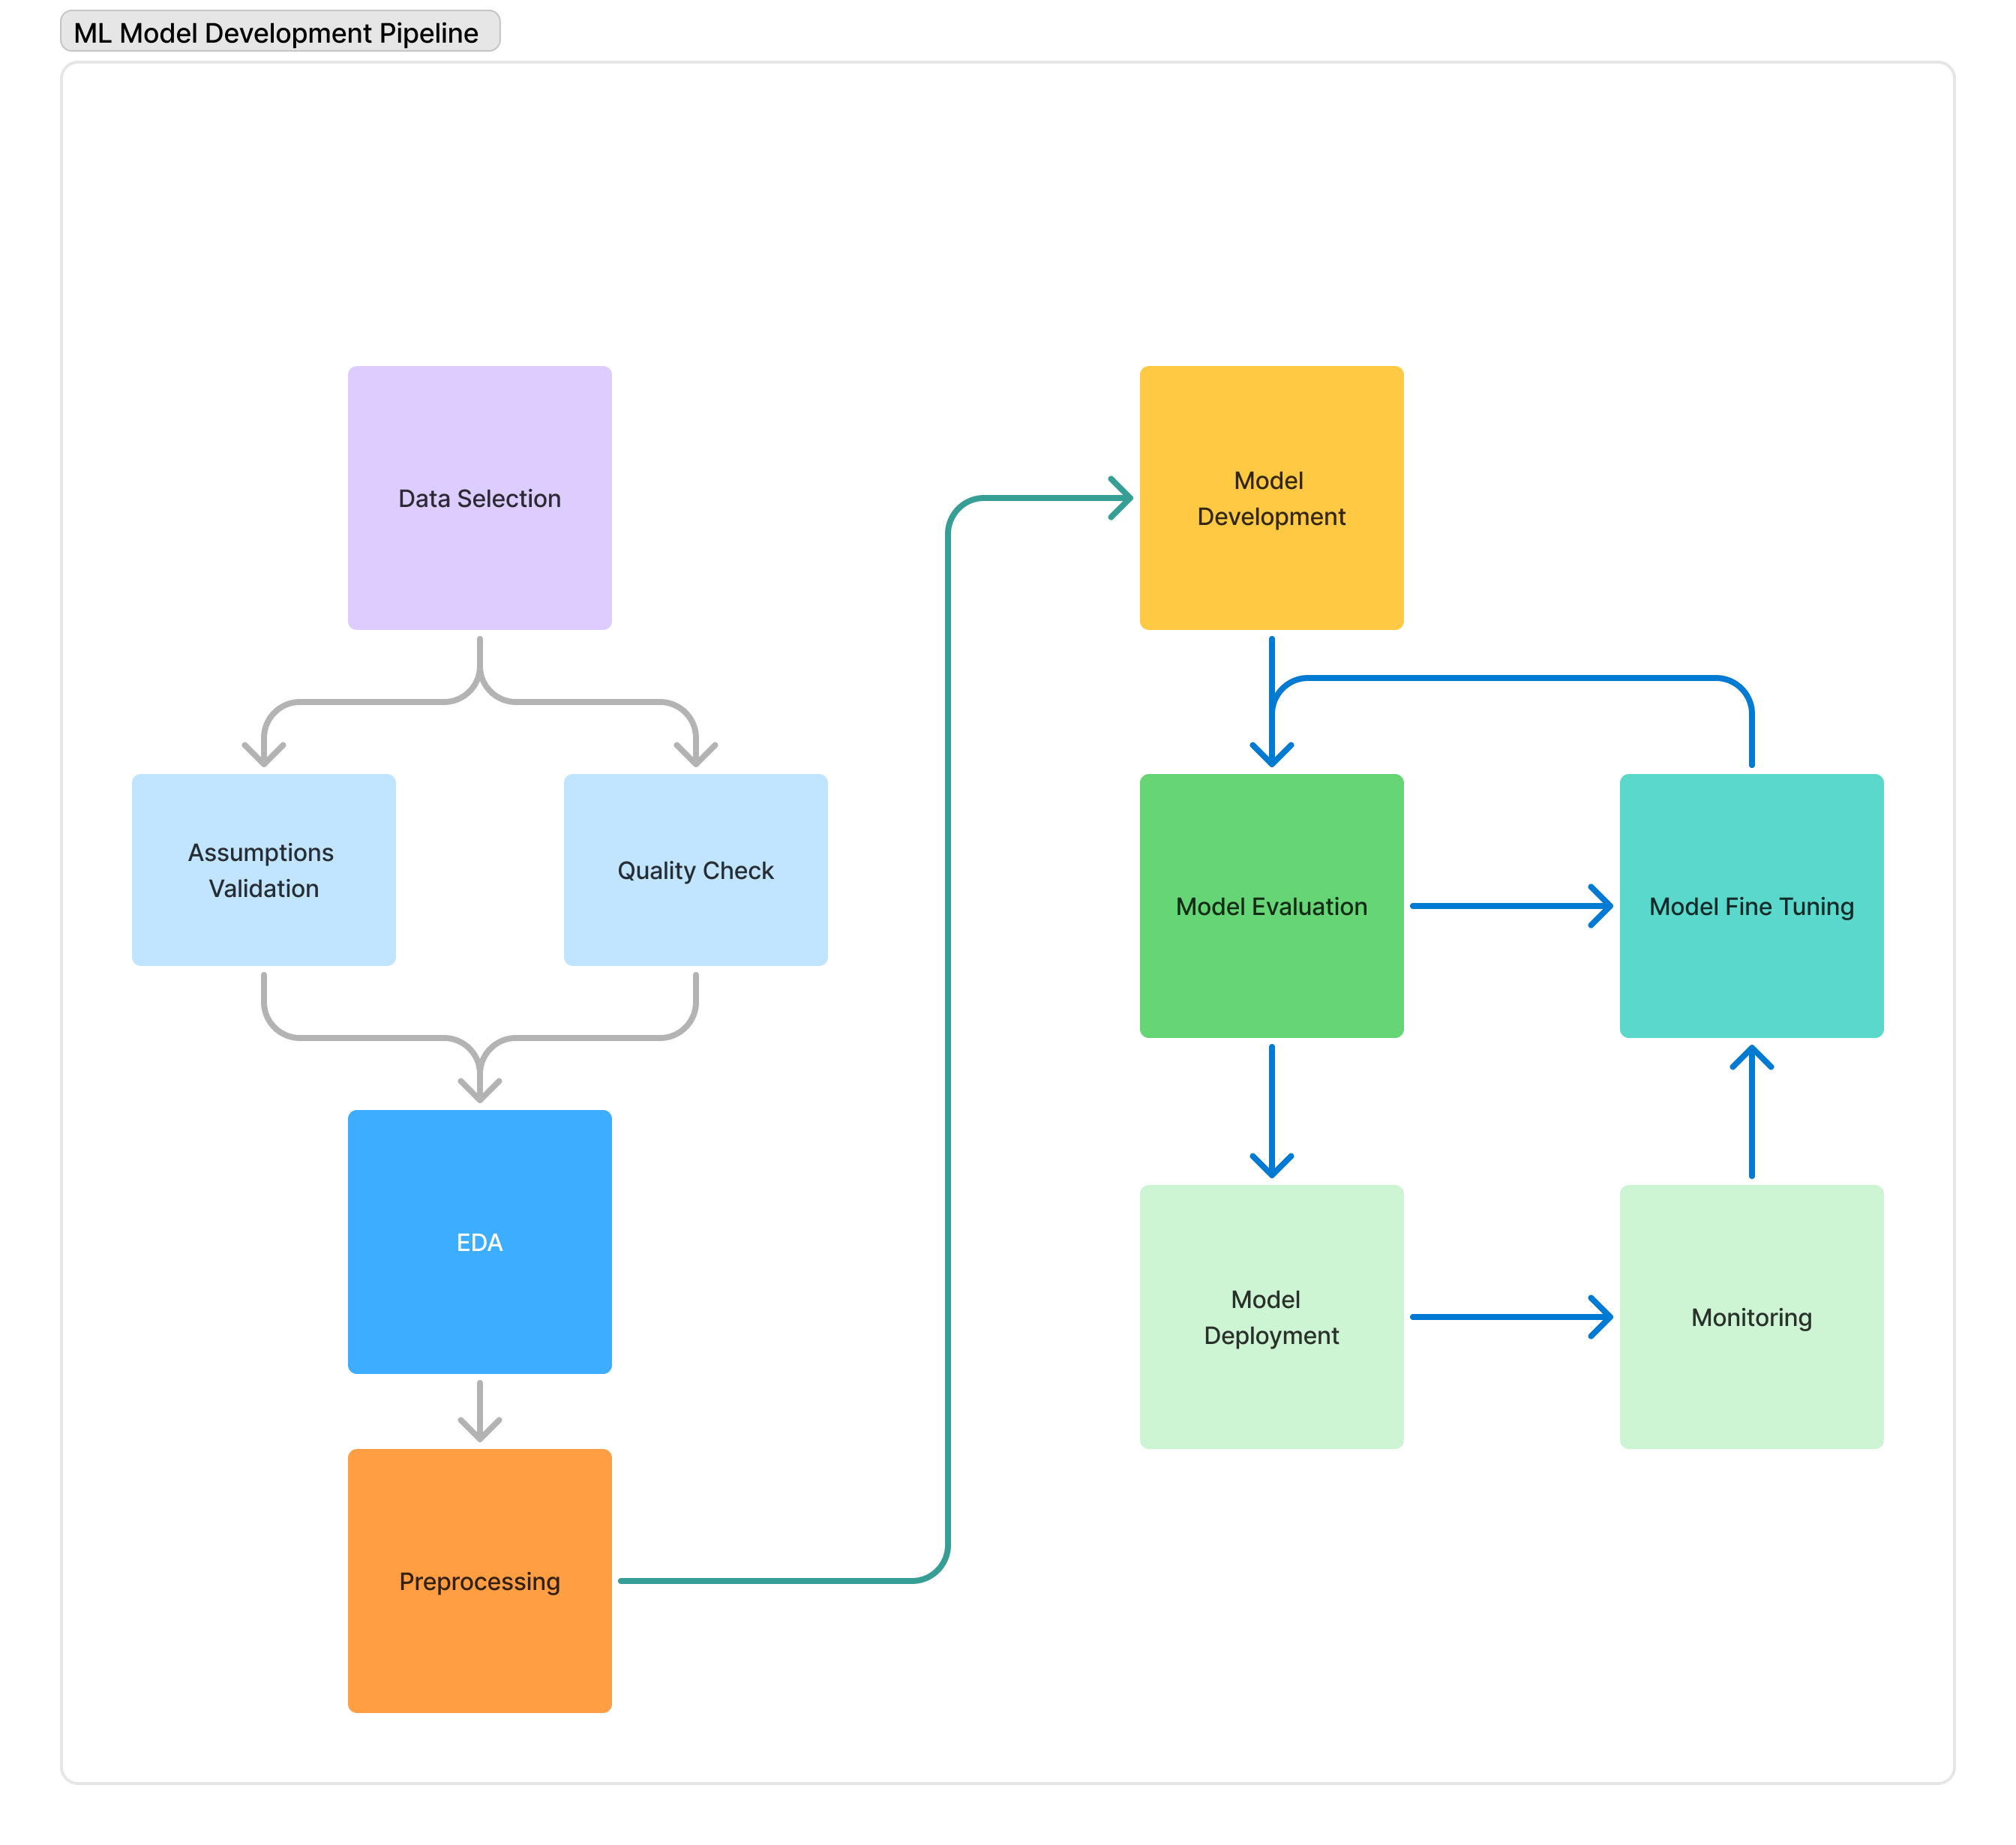

# Approach 1 - Dataset Wine Quality Prediction

## Data Collection


In [ ]:
!pip install ucimlrepo

## Initial Data Analysis

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [ ]:
#check for missing values
print("missing values in features ",X.isnull().sum())
print("missing values in target " ,y.isnull().sum())

missing values in features  fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64
missing values in target  quality    0
dtype: int64


## Exploratory Data Analysis | Assumption Validation

### Linearity Check

In [ ]:
# Compute Pearson correlation coefficients
correlation_matrix = X.corrwith(y.iloc[:, 0]).to_frame(name="Pearson Correlation with y")

# Display correlation values
print("\nFeature vs Target Correlation:")
print(correlation_matrix)


Feature vs Target Correlation:
                      Pearson Correlation with y
fixed_acidity                          -0.076743
volatile_acidity                       -0.265699
citric_acid                             0.085532
residual_sugar                         -0.036980
chlorides                              -0.200666
free_sulfur_dioxide                     0.055463
total_sulfur_dioxide                   -0.041385
density                                -0.305858
pH                                      0.019506
sulphates                               0.038485
alcohol                                 0.444319


/usr/local/lib/python3.11/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/usr/local/lib/python3.11/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/usr/local/lib/python3.11/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/usr/local/lib/python3.11/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/usr/local/lib/python3.11/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/usr/local/lib/python3.11/dist-packages/statsmodels/nonparam

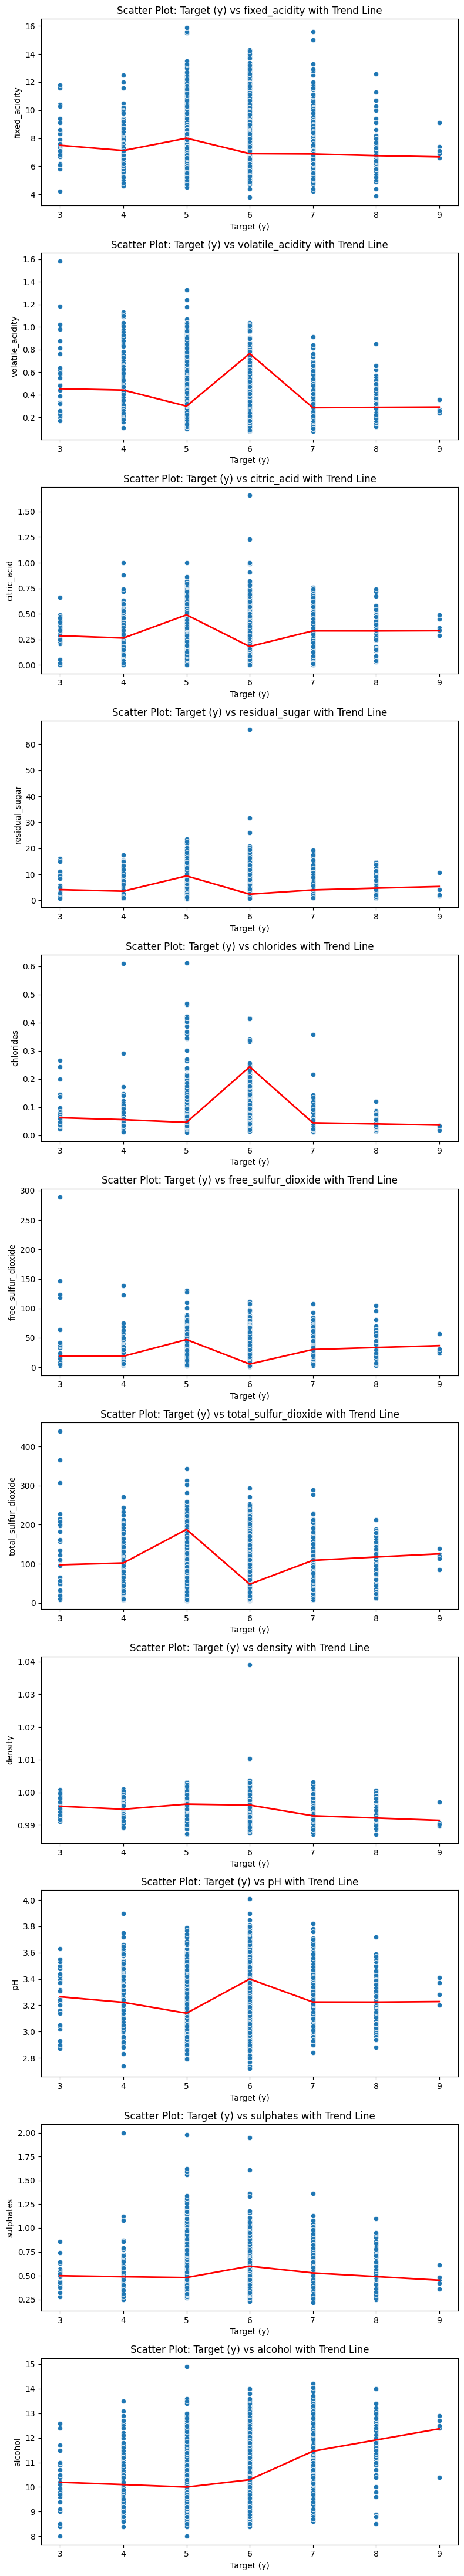

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

# Creating scatter plots with inverted axes (Target y on X-axis, Features on Y-axis)
fig, axes = plt.subplots(nrows=len(X.columns), ncols=1, figsize=(8, 4 * len(X.columns)))

for i, col in enumerate(X.columns):
    ax = axes[i]
    sns.scatterplot(x=y.iloc[:, 0], y=X[col], ax=ax)

    # Fitting a LOWESS (Locally Weighted Scatterplot Smoothing) trend line
    smoothed = lowess(X[col], y.iloc[:, 0], frac=0.3)  # Adjust frac for smoothness

    ax.plot(smoothed[:, 0], smoothed[:, 1], color='red', linewidth=2)  # Trend line
    ax.set_title(f"Scatter Plot: Target (y) vs {col} with Trend Line")
    ax.set_xlabel("Target (y)")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

**Analysis of Scatter Plots for Linearity**

From the scatter plots, we can interpret the linearity assumption for linear regression:
1.	Alcohol vs Target (y):

  •	Shows a somewhat linear trend.

	•	This aligns with the correlation (0.4443), indicating it is a strong predictor.

2.	Volatile Acidity & Density:

  •	Show a negative trend.

	•	These align with their negative correlation values (-0.2657 and -0.3058).

3.	Other Features (Fixed Acidity, Residual Sugar, pH, etc.):

  •	Appear scattered with no clear linear trend.

	•	These have low correlation values, indicating weak linear relationships.




**Conclusion on Linearity**

✅ Alcohol and Density have some linearity, making them suitable for linear regression.

⚠️ Other features may need transformation (log, polynomial) or feature selection.

### Independence of Errors

In [ ]:
import statsmodels.api as sm

# Ensure X has a constant for regression
X_with_const = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X_with_const).fit()

# Get residuals
residuals = model.resid

# Durbin-Watson test for autocorrelation
dw_stat = sm.stats.stattools.durbin_watson(residuals)

print(f"Durbin-Watson Statistic: {dw_stat}")

Durbin-Watson Statistic: 1.6460849519846454


A value between 1.5 and 2.5 generally indicates that residuals are independent, which satisfies the assumption

### Homoscedasticity

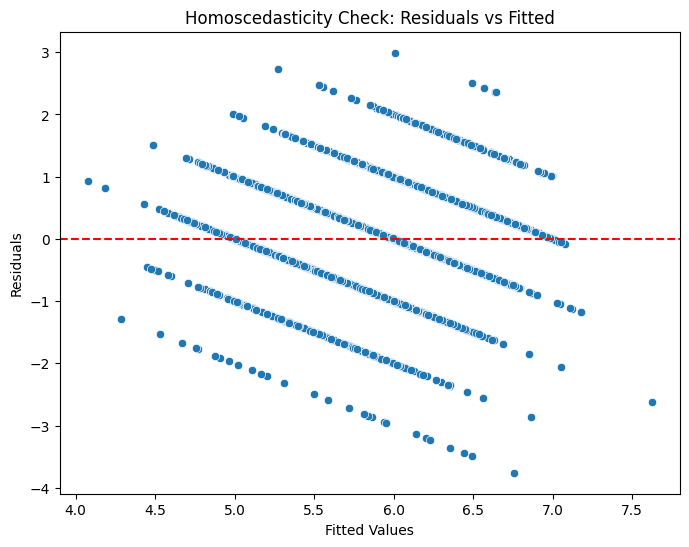

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals vs Fitted Values Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Reference line at 0
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check: Residuals vs Fitted")
plt.show()

**Observations:**
1.	Distinct Parallel Stripes

	•	This indicates that the target variable (y) might be discrete or ordinal, rather than continuous.

	•	In classification-like data (e.g., wine quality ratings in whole numbers), residuals can cluster into bands like this.

2.	No Clear Funnel Shape

	•	If residuals spread wider as fitted values increase, it indicates heteroscedasticity.

	•	Here, the variance looks somewhat stable, so heteroscedasticity may not be a major issue.


**What This Means for Linear Regression**


---


•	The residual structure is likely due to the categorical nature of y rather than true heteroscedasticity.

•	Linear regression assumes a continuous target, so if y is an ordinal variable (e.g., wine quality ratings from 1-10), other methods like ordinal regression or classification models (logistic regression, decision trees) might be more appropriate.

# Approach 2 : MT Cars Dataset

## Data Collection

In [12]:
import pandas as pd

# Import CSV mtcars
df = pd.read_csv('https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv')
# Edit element of column header
df.rename(columns={'Unnamed: 0':'brand'}, inplace=True)

In [13]:
df.dtypes

,0
brand,object
mpg,float64
cyl,int64
disp,float64
hp,int64
drat,float64
wt,float64
qsec,float64
vs,int64
am,int64


In [14]:
df.iloc[1]

,1
brand,Mazda RX4 Wag
mpg,21.0
cyl,6
disp,160.0
hp,110
drat,3.9
wt,2.875
qsec,17.02
vs,0
am,1


## Linearity Check

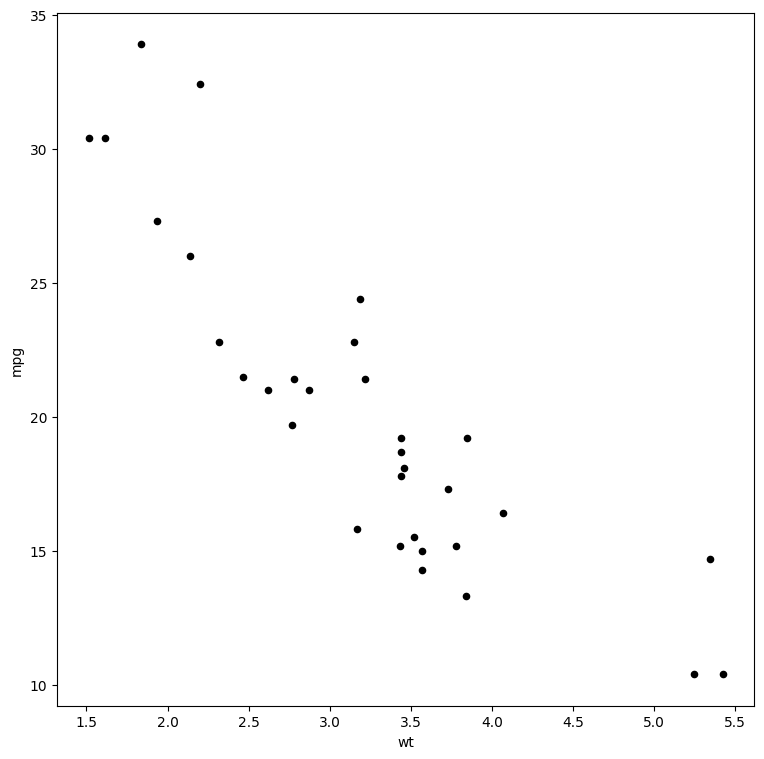

In [15]:
df.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black");

There is a linear relationship with the weight and the milage.

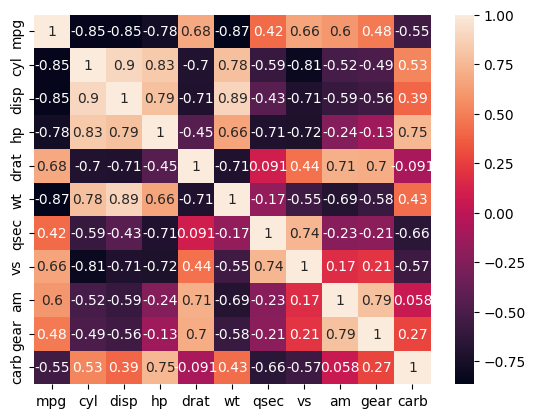

In [24]:
import seaborn as sns
#remove the brand column
df_corr = df.drop('brand', axis=1)
#plot the correlation map
sns.heatmap(df_corr.corr(), annot=True);


# Model Development

In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Select independent and dependent variables
X = df[['wt']]  # Independent variable
y = df['mpg']   # Dependent variable

# Split the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



Mean Squared Error: 12.48
R² Score: 0.69
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     77.06
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           8.41e-09
Time:                        14:06:55   Log-Likelihood:                -61.108
No. Observations:                  25   AIC:                             126.2
Df Residuals:                      23   BIC:                             128.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

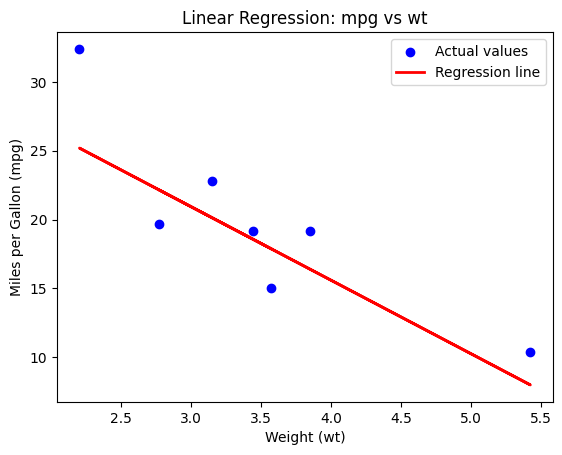

In [26]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# **Using statsmodels for detailed summary**
X_train_sm = sm.add_constant(X_train)  # Adding constant for intercept
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

# **Plot regression line**
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel("Weight (wt)")
plt.ylabel("Miles per Gallon (mpg)")
plt.title("Linear Regression: mpg vs wt")
plt.legend()
plt.show()

# Conclusion